# Student ID: XXX

**You student_id is your 7/8 digit faser number.**

This is a sample format for CE807-SU: Assignment 2. You must follow the format.
The code will have three broad sections, and additional section, if needed,


1.   Common Codes
2.   Supervised Training Codes
3.   Other Method/model Codes, if any

**You must have `train_method` This will be evaluated automatically, without this your code will fail and no marked.**

You code should be proverly indended, print as much as possible, follow standard coding (https://peps.python.org/pep-0008/) and documentaion (https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb) practices.

Before each `code cell`, you must have a `text cell` which explain what code cell is going to do. For each function/class, you need to properly document what are it's input, functionality and output.

If you are using any non-standard library, you must have command to install that, for example `pip install datasets`.

You must print `train`, `validation` and `test` performance measures.

You must also print `train` and `validation` loss in each `epoch`, wherever you are using `epoch`, say in any deep learning algorithms.

Your code must

*   To reproducibality of the results you must use a `seed`, you have to set seed in `torch`, `numpy` etc, use same seed everywhere **and your Student ID should be your seed**.
*   read dataset from './CE807-SU/Assignment2/student_id/' folder which will have 3 files [`train.csv`, `val.csv`, `test.csv`]
*   save model after finishing the training in './CE807-SU/Assignment2/student_id/models/XXX/' where XXX = [1,2]
*   at testing time you will load models from './CE807-SU/Assignment2/student_id/models/XXX/' where XXX = [1,2] and then test on your data, and save the output in the same folder

*   **Your output file based on the test file will be named `output_test.csv` and will have the existing columns from test.csv and `out_label`** You need to save file in the respective model folders.




**Install and import all required libraries first before starting to code.**








Let's install all require libraries. For example, `transformers`

Let's import all require libraries.
For example, `numpy`

**Let's put your student id as a variable, that you will use different places**

In [51]:
student_id = 2214000 # Note this is an interger and you need to input your id

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [52]:
# set same seeds for all libraries
import numpy as np
#numpy seed
seed = np.random.seed(student_id)

In [53]:
!pip install transformers

## Setup Code
Before getting started we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [54]:
import numpy as np
import os
import pandas as pd

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Let's first allow the GDrive access and set data and model paths**

For examples,

student_id = 1234567

set GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = ‘./CE807-SU/Assignment2/student_id/’ in your GDrive

now set all global variable,


train_file = os.path.join(GOOGLE_DRIVE_PATH_AFTER_MYDRIVE, 'train.csv')

MODEL_1_DIRECTORY = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH, ‘models’, ‘1’)


model_1_output_test_file = os.path.join(MODEL_1_DIRECTORY,'output_test.csv')

Sample output directory and file structure: https://drive.google.com/drive/folders/1ohkXpVvXCl3vJpWGhSlgjqjsno27O5KP?usp=sharing

In [56]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [57]:
import sys


In [58]:
# Add your code to initialize GDrive and data and models paths

# TODO: Fill in the Google Drive path where you uploaded the assignment, data and code
# Example: If your student_id is 1234567 then your directory will be './CE807-SU/Assignment2/1234567/'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807-SU/Assignment2/',str(student_id)) # Make sure to update with your student_id and student_id is an integer
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
sys.path.append(GOOGLE_DRIVE_PATH)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
print('Train file: ', train_file)

test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Test file: ', test_file)

val_file= os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('Valid file: ', val_file)


MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)



List files:  ['test.csv', 'train.csv', 'valid.csv', '__pycache__', 'models', 'trainUnSup.ipynb', 'testUnSup.ipynb', 'common_code.py', 'testSup.ipynb', 'trainSup.ipynb']
Train file:  gdrive/MyDrive/./CE807-SU/Assignment2/2214000/train.csv
Test file:  gdrive/MyDrive/./CE807-SU/Assignment2/2214000/test.csv
Valid file:  gdrive/MyDrive/./CE807-SU/Assignment2/2214000/valid.csv
Model 1 directory:  gdrive/MyDrive/./CE807-SU/Assignment2/2214000/models/1


# Common Codes

You will write all common codes in `common_code.py` file and use train/test for both models, for examples


*   Data read
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output (during training)
*   Loading Model and output (during testing)
*   etc




In [59]:
from common_code import read_csv_dataset,prepare_dataset_nn,calculate_dataset_details,compute_performance,load_model,text_preprocessing,tfidf_word_vectorizer_features,tfidf_char_vectorizer_features,char_embeddings_features,doc_embeddings_features,save_model,create_feature_matrix,lemmatized_text,preprocess_and_topic_model,get_dominant_topic,save_label_encoder,save_lda_model_and_dictionary,save_model_hypertuning,balance_dataset,collate_batch,HateSpeechClassificationMLP,HateSpeechClassificationMLPDataset,save_model_nn,predict,augment_data,evaluate

In [60]:
import torch
print(torch.__version__)

2.0.1+cu118


In [61]:
import torch
import torch.nn as nn

# Import pprint, module we use for making our print statements prettier
import pprint
pp = pprint.PrettyPrinter()

**Data reading**

**Let's see train file**

In [62]:
train_df = read_csv_dataset(train_file)

Read  gdrive/MyDrive/./CE807-SU/Assignment2/2214000/train.csv
                    id                                               text  \
0  1161144195366543360  Show me love, show me fuckin love cause I thou...   
1  1188164555660316672             @USER Why does the @USER hate defense?   
2  1186400070209560577  @USER I know they aren’t the same but that doe...   
3  1159880652306702336                     @USER She cute as fuck right 😬   
4  1187350808461008896  @USER That why those frauds Ebuka and co brush...   

  label  
0   NOT  
1   NOT  
2   NOT  
3   OFF  
4   NOT  


**Print the shape of the train data frame.**



In [63]:
train_df.shape

(2800, 3)

**Information about the columns.**

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2800 non-null   int64 
 1   text    2800 non-null   object
 2   label   2800 non-null   object
dtypes: int64(1), object(2)
memory usage: 65.8+ KB


**Training data frame shape = non-null values = 2800.
Therefore, there are no null values in the dataset.**

**Let's see test file**

In [65]:
test_df = read_csv_dataset(test_file)

Read  gdrive/MyDrive/./CE807-SU/Assignment2/2214000/test.csv
      id                                              tweet label
0   A272  @USER  question for our home game against @USE...   NOT
1  A2244  i dont get it, why does roblox shit on you for...   OFF
2  A1564  The left blames President Trump for everything...   OFF
3  A2081                      @USER thanks for your follow!   NOT
4  A3306            An artist will fall in love with a fan.   NOT


**Let's see validation file**

In [66]:
val_df = read_csv_dataset(val_file)

Read  gdrive/MyDrive/./CE807-SU/Assignment2/2214000/valid.csv
                    id                                               text  \
0  1159587382963908608  My life is nothing what I expected it to be at...   
1  1161558433352605696  that bitch is talking about toxic people when ...   
2  1186120727596015616  I didn’t realize Texas had so many tornados un...   
3  1161424541995847682    @USER Why you tweeting this filth at this hour?   
4  1186135948179886080         @USER Don't get lost in The World Wide Web   

  label  
0   NOT  
1   OFF  
2   NOT  
3   NOT  
4   NOT  


**Dataset details for the given train.csv, test.csv, and val.csv.Assuming "Original" dataset includes all samples from "Train," "Valid," and "Test" sets.**

In [67]:
dataset_details_df = calculate_dataset_details(train_df, test_df, val_df)
print(dataset_details_df)

    Dataset  Total % Class A % Class B
0  Original   4000     91.40      8.60
1     Train   2800     96.18      3.82
2     Valid    400     96.25      3.75
3      Test    800     72.25     27.75


## Text Pre-processing

In [68]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**The function text_preprocessing() performs tokenization, lowercasing, noise removal, and stop words removal on a single text input, storing the preprocessed text in a new column called 'preprocessed_text'.**

In [69]:
# Apply text preprocessing to the 'text' column
train_df['preprocessed_text'] = train_df['text'].apply(text_preprocessing)
val_df['preprocessed_text'] = val_df['text'].apply(text_preprocessing)

# Display the preprocessed data
print(train_df.head())
print(val_df.head())

                    id                                               text  \
0  1161144195366543360  Show me love, show me fuckin love cause I thou...   
1  1188164555660316672             @USER Why does the @USER hate defense?   
2  1186400070209560577  @USER I know they aren’t the same but that doe...   
3  1159880652306702336                     @USER She cute as fuck right 😬   
4  1187350808461008896  @USER That why those frauds Ebuka and co brush...   

  label                                  preprocessed_text  
0   NOT   show love  show fuckin love cause thought needed  
1   NOT                           user  user hate defense   
2   NOT                    user know ’ ’ mean ’ sick ’ lol  
3   OFF                             user cute fuck right 😬  
4   NOT   user frauds ebuka co brushed  tacha antagonis...  
                    id                                               text  \
0  1159587382963908608  My life is nothing what I expected it to be at...   
1  11615584333526

In [70]:
# Access the 'label' column
label = train_df['label'].to_numpy()

unique, counts = np.unique(label, return_counts=True)

print("Total number of tweets: " + str(label.size))
for i in range(len(unique)):
    print("Class " + str(unique[i]) + " has " + str(counts[i]) + " tweets.")

Total number of tweets: 2800
Class NOT has 2693 tweets.
Class OFF has 107 tweets.


In [71]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [72]:
# Mapping of label values to numeric values
label_mapping = {'NOT': 0, 'OFF': 1}

# Convert 'label' column to numeric form
train_df['label'] = train_df['label'].map(label_mapping)
val_df['label'] = val_df['label'].map(label_mapping)

## Data Augmentation

**I have created functions to augment training data by replacing offensive words in tweets with their synonyms. These functions involve finding candidate synonyms for words with specific Part-of-Speech (POS) tags and creating augmented data. The functions include `augment_data(train_df)`, `word_to_replace(word, cand), `word_to_be_replace(token, tag), and `augment_tweet(tweet).` These functions ensure distinct, single-word candidate synonyms, and improve the model's performance by increasing the diversity of examples during training. The quality of augmentation depends on the availability and accuracy of synonyms found in WordNet. These functions are available in teh common code file.**
**(Acknowledgment: These code snippets were inspired by the [1].)**

**Let's Augment our training data**

In [73]:
# Apply data augmentation
train_df_augmented = augment_data(train_df)

# Display the augmented data
print(train_df_augmented.head())

             id                                               text  label  \
0  1.161144e+18  Show me love, show me fuckin love cause I thou...      0   
1  1.188165e+18             @USER Why does the @USER hate defense?      0   
2  1.186400e+18  @USER I know they aren’t the same but that doe...      0   
3  1.159881e+18                     @USER She cute as fuck right 😬      1   
4  1.187351e+18  @USER That why those frauds Ebuka and co brush...      0   

                                   preprocessed_text  
0   show love  show fuckin love cause thought needed  
1                           user  user hate defense   
2                    user know ’ ’ mean ’ sick ’ lol  
3                             user cute fuck right 😬  
4   user frauds ebuka co brushed  tacha antagonis...  


In [74]:
# Access the 'label' column
label = train_df_augmented['label'].to_numpy()

unique, counts = np.unique(label, return_counts=True)

print("Total number of tweets: " + str(label.size))
for i in range(len(unique)):
    print("Class " + str(unique[i]) + " has " + str(counts[i]) + " tweets.")

Total number of tweets: 3254
Class 0 has 2693 tweets.
Class 1 has 561 tweets.


**After augmentation, I am balancing the dataset to ensure that each class ('NOT' and 'OFF') has equal samples.**

In [75]:
balanced_df = balance_dataset(train_df_augmented)

In [76]:
# Access the 'label' column
label = balanced_df['label'].to_numpy()

unique, counts = np.unique(label, return_counts=True)

print("Total number of tweets: " + str(label.size))
for i in range(len(unique)):
    print("Class " + str(unique[i]) + " has " + str(counts[i]) + " tweets.")

Total number of tweets: 5386
Class 0 has 2693 tweets.
Class 1 has 2693 tweets.


**Now we have about a 50-50 split for both classes**

#Supervised Method Start (Method 1)

In this section you will write all details of your Method 1.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model


You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


**Preparing a dataset for a neural network using PyTorch**

**Determining the dimensions of balanced data**

In [77]:
train_data = balanced_df
train_data.shape

(5386, 4)

**DataLoader to create batches for training**

**The below code  ensures GPU computation for deep learning tasks allowing code compatibility across machines without rewriting code.**

In [78]:
import torch
torch.manual_seed(student_id)#Setting a seed to ensure that random number generators are used by PyTorch
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
device

device(type='cpu')

**This function accepts balanced_df DataFrame with a 'preprocessed_text' column as input and generates tokenized sentences from the 'preprocessed_text' column and maintains track of the offsets in the tokenized sequence where each sentence begins.**

In [79]:
import torch
import pandas as pd
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import pickle

def yield_tokens_with_offsets(data_frame):
    """
    Function to yield tokenized text and offsets from the DataFrame

    Parameters:
        data_frame (pandas.DataFrame): The DataFrame containing the 'preprocessed_text' column.

    Yields:
        list of str: Tokenized sentences from the 'preprocessed_text' column.

    Returns:
        list of int: Offsets representing the starting index of each sentence in the tokenized sequence.
    """
    offsets = [0]  # Initialize offsets list with the first index
    for text in data_frame['preprocessed_text']:
        if isinstance(text, str):
            tokens = tokenizer(text)  # Convert text to lowercase before tokenization
            offsets.append(len(tokens))  # Store the index where the next sentence starts
            yield tokens
        else:
            print(f"Warning: Invalid text found in DataFrame: {text}")

    return offsets

**This code is to test the model without data augmentation and balancing. So it is commented.**

In [80]:
#balanced_df = train_df

**Without data augmentation and balancing the results are :**

Computing different preformance metrics on train  set of Dataset
F1 Score(macro):  0.9298878205128205
Accuracy:  0.9907142857142858
Confusion matrix - Train set
[[2691    2]
 [  24   83]]
Computing different preformance metrics on valid  set of Dataset
F1 Score(macro):  0.7614788312462732
Accuracy:  0.97
Confusion matrix - Validation set
[[381   4]
 [  8   7]]

 Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.5401481481481482
Accuracy:  0.7575
Confusion matrix - Test set
[[578   0]
 [194  28]]

 The model achieved a moderate accuracy of 75.75% in the test set, but its macro F1 score is lower at 0.5401. This suggests that the model may not generalize well to the test set and may struggle with certain instances correctly. The confusion matrix shows that the model correctly classified 578 samples from the "NOT" class and 28 samples from the "OFF" class, but misclassified 194 samples from the "OFF" class as "NOT" and did not misclassify any samples from the "NOT" class as "OFF".

**The below code creates a tokenizer, constructs a vocabulary with 20 tokens, saves it for language model training, and adds '' tokens during model training. The vocabulary is saved as a file called "vocab.sav" and serialized using pickle.dump.**

In [99]:
# Create a tokenizer using 'basic_english' preset
tokenizer = get_tokenizer('basic_english')

# Build a vocabulary from the tokenized data in train_df with a minimum frequency of 20 and including the '<unk>' token
vocab = build_vocab_from_iterator(yield_tokens_with_offsets(balanced_df), min_freq=20, specials=["<unk>"])

# Set the default index for the vocabulary to handle unknown tokens
vocab.set_default_index(vocab["<unk>"])

# Save the vocabulary to disk
vocab_file = os.path.join(MODEL_1_DIRECTORY, "vocab.sav")
pickle.dump(vocab, open(vocab_file, "wb"))

**The text_pipeline lambda function tokenizes a text string, uses vocabulary to convert tokens to integer indices, and prepares it for language model input as integer sequences.**

In [82]:
text_pipeline = lambda x: vocab(tokenizer(x))

**Let's pass a preprocessed test 'show love  show fuckin love cause thought needed' to our text_pipeline.**

In [83]:
text_pipeline('show love  show fuckin love cause thought needed')

[333, 28, 333, 0, 28, 498, 131, 0]

## **Multi-layer Perceptron (MLP) model**

**I have created a HateSpeechClassificationMLP class, an MLP model for hate speech classification, using nn.EmbeddingBag for variable-length input text. It has four connected layers with ReLU activations, initialized with random weights, and computes logits for classification tasks. Softmax function can be applied to obtain class probabilities. It is available in the common code file.**

In [84]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

**The below code initializes the hyperparameters and creates an instance of the HateSpeechClassificationMLP model.**

In [85]:
vocab_size = len(vocab)
embed_dim = 100
num_class = 2
hidden_size1 = 128
hidden_size2 = 64
hidden_size3 = 32
BATCH_SIZE = 32

model_mlp = HateSpeechClassificationMLP(vocab_size, embed_dim, num_class, hidden_size1, hidden_size2, hidden_size3).to(device)

**The architecture of the HateSpeechClassificationMLP**

In [86]:
print(model_mlp)

HateSpeechClassificationMLP(
  (embedding): EmbeddingBag(540, 100, mode='mean')
  (activation): ReLU()
  (fc1): Linear(in_features=100, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=2, bias=True)
)


**The `HateSpeechClassificationMLP` model is a linear model that consists of an `EmbeddingBag` layer, an `Activation` function, and fully connected (linear) layers `fc1`, `fc2`, `fc3`, and `fc4`. The `EmbeddingBag` layer handles variable-length input sequences, while the `Activation` function applies the element-wise ReLU function to its input, setting all negative values to zero and leaving the positive values unchanged. The fully connected layers perform linear transformations on their input data and are followed by the `ReLU` activation function, except for the output layer (`fc4`). The architecture is designed to process text data and make predictions about hate speech classification.**

**Print the model to see it's parameters**

In [87]:
list(model_mlp.named_parameters())

[('embedding.weight',
  Parameter containing:
  tensor([[-0.1999, -0.3538, -0.4346,  ..., -0.4248,  0.3130, -0.4111],
          [ 0.3406, -0.4023, -0.0774,  ..., -0.1552, -0.3741, -0.4430],
          [-0.2307,  0.1259,  0.1699,  ...,  0.0519, -0.4353,  0.1552],
          ...,
          [-0.0270,  0.3290, -0.3242,  ...,  0.2829, -0.2534,  0.2502],
          [-0.0551, -0.4752,  0.3625,  ...,  0.3225, -0.1868,  0.2447],
          [ 0.0047, -0.0279,  0.1592,  ...,  0.2271,  0.3624, -0.3251]],
         requires_grad=True)),
 ('fc1.weight',
  Parameter containing:
  tensor([[ 0.0358,  0.2668, -0.3092,  ..., -0.3427, -0.2443,  0.1565],
          [-0.0149,  0.2560, -0.0547,  ..., -0.1988,  0.1635,  0.2834],
          [-0.1649,  0.3433,  0.2109,  ..., -0.2609, -0.2976,  0.0061],
          ...,
          [-0.1159,  0.4690, -0.1904,  ..., -0.2393, -0.4428,  0.2253],
          [-0.1533,  0.3540, -0.0114,  ...,  0.1654,  0.1781,  0.1207],
          [-0.3257,  0.2660, -0.0215,  ..., -0.3058, -0.1255

**The below code iterates through the parameters of the model_mlp and prints the shape of each parameter.**

In [88]:
for parameter in model_mlp.parameters():
  print(parameter.shape)

torch.Size([540, 100])
torch.Size([128, 100])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([32, 64])
torch.Size([32])
torch.Size([2, 32])
torch.Size([2])


**As seen from the output, the parameter.shape represents the shape of each parameter tensor in the model. The first line represents the embedding layer's weight, with a shape of [vocabulary_size, embedding_dimension]. The next lines display the weights and biases of fully connected layers, such as fc1.weight, which represents the weights connecting the input embedding to the first hidden layer.**

**Let's set up custom datasets and data loaders for training and validation.**

**The below code creates custom datasets for training and validation using the HateSpeechClassificationMLPDataset class. It creates data loaders for training and validation, efficiently loading and processing data in batches. The training data loader introduces randomness, while the validation data loader does not.**

In [89]:
# Create your custom dataset and DataLoader for training
train_datasets = HateSpeechClassificationMLPDataset(balanced_df, tokenizer, vocab)
# Create DataLoader with the collate_fn and shuffle the training data
train_loaders = DataLoader(train_datasets, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

# Create your custom dataset and DataLoader for validation
val_datasets = HateSpeechClassificationMLPDataset(val_df, tokenizer, vocab)
# Create DataLoader with the collate_fn (no need to shuffle validation data)
val_loaders = DataLoader(val_datasets, batch_size=BATCH_SIZE, collate_fn=collate_batch)

**The below code defines a function called train_epoch, which performs one training epoch for a neural network model on data using an optimizer and loss criterion. The function calculates the average training loss by dividing the total loss by the number of batches. This function is useful for training neural networks for one epoch and is called multiple times in a loop.**

In [90]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

def train_epoch(model, dataloader, epoch, optimizer, criterion, device):
    """
    Perform one training epoch for the given model on the provided data.

    Args:
        criterion (torch.nn.Module):loss function to compute the training loss.
        optimizer (torch.optim.Optimizer):optimizer .
        model (torch.nn.Module): neural network model.
        data_loader (torch.utils.data.DataLoader):data loader.

    Returns:
        float: The total training loss for the epoch.
    """
    model.train()
    total_loss = 0
    for idx, (label, text, offsets) in enumerate(dataloader):
        text, label = text.to(device), label.to(device)
        optimizer.zero_grad()
        predicted_label = model(text, offsets)
        loss = criterion(predicted_label, label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(dataloader)


**The below code defines a function named train that performs model training for a single epoch. It returns the average training loss for the epoch, which is calculated by dividing the total loss by the number of batches (len(data_loader)).**

In [91]:
# Function to train the model
def train(model, loss_function, data_loader):
    """
    Function to train the model on the training set for one epoch.

    Parameters:
        model (torch.nn.Module): The PyTorch model to be trained.
        loss_function (torch.nn.Module): The loss function used to calculate the training loss.
        data_loader (torch.utils.data.DataLoader): The DataLoader containing the training data.
        optimizer (torch.optim.Optimizer): The optimizer used for updating model parameters during training.
        device (str): The device (e.g., "cuda" or "cpu") on which the model and data are located.

    Returns:
        float: The average training loss for the epoch.
    """
    model.train()
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            batch_inputs = batch[0].to(device)
            batch_labels = batch[1].to(device)
            outputs = model.forward(batch_inputs)
            loss = loss_function(outputs, batch_labels)
            total_loss += loss.item()

    return total_loss / len(data_loader)

**The below code defines a validate function is used to evaluate the performance of a trained PyTorch model on a validation dataset. It computes the average validation loss over the entire validation dataset.**

In [92]:
# Function to validate the model
def validate(model, loss_function, data_loader):
    """
    Function to validate the model on the validation set.

    Parameters:
        model (torch.nn.Module): The PyTorch model.
        loss_function (torch.nn.Module): function used to compute the validation loss.
        data_loader (torch.utils.data.DataLoader): Validation dataset DataLoader.

    Returns:
        float: The average validation loss.
    """
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            batch_inputs = batch[0].to(device)
            batch_labels = batch[1].to(device)
            outputs = model.forward(batch_inputs)
            loss = loss_function(outputs, batch_labels)
            total_loss += loss.item()

    return total_loss / len(data_loader)


## Training Method Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

**The neural network is trained and is monitored for training progress and performance on the validation set.**

**This function is the primary entry point for training and evaluating the model on the supplied datasets, as well as saving the best model.**

In [93]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def train_method(train_file, val_file, model_dir):
    """
     Takes train_file, val_file and model_dir as input.
     It trained on the train_file datapoints, and validate on the val_file datapoints.
     While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
     After finishing the training, it saved the best model in the model_dir.

     ADD Other arguments, if needed.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory

    """
    lr=0.001
    PATIENCE = 3
    N_EPOCHS = 10
    optimizer = optim.Adam(model_mlp.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    best_valid_loss = float('inf')
    consecutive_increasing_epochs = 0
    # Lists to store training and validation losses for each epoch
    train_losses = []
    valid_losses = []
    for epoch in range(1, N_EPOCHS + 1):
        print(f'Epoch {epoch}')
        epoch_start_time = time.time()
        train_loss = train_epoch(model_mlp, train_loaders, epoch, optimizer, criterion, device)
        train_losses.append(train_loss)
        print(f'Training Loss: {train_loss:.4f}')

        val_loss = evaluate(model_mlp, val_loaders, criterion, device)
        valid_losses.append(val_loss)
        print(f'Validation Loss: {val_loss:.4f}')

        print(f'Time taken for epoch {epoch}: {time.time() - epoch_start_time:.2f} seconds')

        # Early stopping check
        if val_loss < best_valid_loss:
            best_valid_loss = val_loss
            consecutive_increasing_epochs = 0
        else:
            consecutive_increasing_epochs += 1
            if consecutive_increasing_epochs >= PATIENCE:
                print(f'Validation loss did not improve for {PATIENCE} epochs. Stopping training.')
                break
    # Save the model state when the validation loss is at its minimum
    model_file, tokenizer_file = save_model_nn(model_mlp, tokenizer, MODEL_1_DIRECTORY)

    print('Training completed.')
    # Plot the Loss vs. Epoch plot
    epochs_list = list(range(1, len(train_losses) + 1))
    plt.plot(epochs_list, train_losses, label='Train Loss')
    plt.plot(epochs_list, valid_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss Plot')
    plt.show()

    train_gt_labels, train_pred_labels = predict(model=model_mlp,device=device, dataloader=train_loaders)
    # Compute F1 score and print confusion matrix for the train set
    train_f1_score = compute_performance(train_gt_labels, train_pred_labels, split='train')
    print("Confusion matrix - Train set")
    print(confusion_matrix(train_gt_labels, train_pred_labels))

    val_gt_labels, val_pred_labels = predict(model=model_mlp,device=device, dataloader=val_loaders)
    # Compute F1 score and print confusion matrix
    val_f1_score = compute_performance(val_gt_labels, val_pred_labels, split='valid')
    print("Confusion matrix - Validation set")
    print(confusion_matrix(val_gt_labels, val_pred_labels))


Training NN model
Epoch 1
Training Loss: 0.2098
Validation Loss: 0.2145
Time taken for epoch 1: 5.05 seconds
Epoch 2
Training Loss: 0.0483
Validation Loss: 0.1862
Time taken for epoch 2: 7.80 seconds
Epoch 3
Training Loss: 0.0288
Validation Loss: 0.1897
Time taken for epoch 3: 5.59 seconds
Epoch 4
Training Loss: 0.0245
Validation Loss: 0.2032
Time taken for epoch 4: 2.55 seconds
Epoch 5
Training Loss: 0.0196
Validation Loss: 0.1969
Time taken for epoch 5: 1.88 seconds
Validation loss did not improve for 3 epochs. Stopping training.
Saved model to gdrive/MyDrive/./CE807-SU/Assignment2/2214000/models/1/model.sav
Saved tokenizer to gdrive/MyDrive/./CE807-SU/Assignment2/2214000/models/1/tokenizer.sav
Training completed.


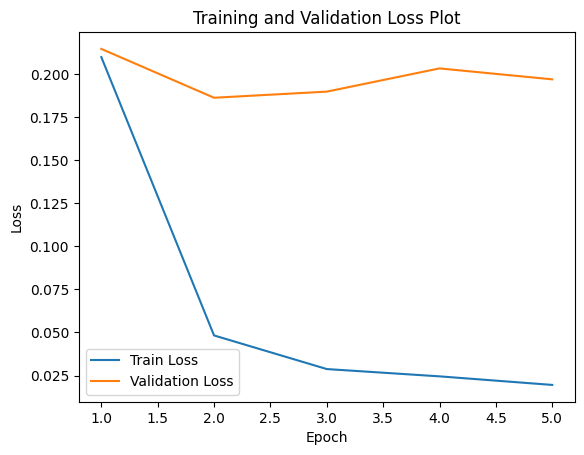

Computing different preformance metrics on train  set of Dataset
F1 Score(macro):  0.9968436373258553
Accuracy:  0.9968436687708875
Confusion matrix - Train set
[[2693    0]
 [  17 2676]]
Computing different preformance metrics on valid  set of Dataset
F1 Score(macro):  0.6811946809849406
Accuracy:  0.9525
Confusion matrix - Validation set
[[375  10]
 [  9   6]]


In [94]:
print('Training NN model')
train_method(train_file, val_file, MODEL_1_DIRECTORY)

**The neural network model has been trained and evaluated on both training and validation datasets. The training loss decreases as epochs increase, indicating successful learning from the training data. However, the validation loss fluctuates and does not show consistent improvement, leading to early stopping after the third epoch. The best model with the lowest validation loss was saved to the specified model directory. The model's F1 score is high, indicating excellent overall performance on the training set. However, the F1 score on the validation set is lower than on the training set, suggesting that the model might be overfitting to the training data and not generalizing well to unseen data. The confusion matrix shows few misclassifications, with false positives and false negatives in both classes, suggesting the model struggles to generalize well to the validation data.**

**The model can now be used for making predictions on new, unseen data**

The below code is for testing purpose only. Hence commented.



In [95]:
# Apply text preprocessing to the 'text' column
# test_df['preprocessed_text'] = test_df['tweet'].apply(text_preprocessing)

# Display the preprocessed data
# print(test_df.head())

In [96]:
# Mapping of label values to numeric values
#label_mapping = {'NOT': 0, 'OFF': 1}

# Convert 'label' column to numeric form
#test_df['label'] = test_df['label'].map(label_mapping)

In [97]:
# Create your custom dataset and DataLoader for test set
#test_datasets = HateSpeechClassificationMLPDataset(test_df, tokenizer, vocab)

#test_loaders = DataLoader(test_datasets, batch_size=32, collate_fn=collate_batch)
#criterion = nn.CrossEntropyLoss()
#test_loss = evaluate(model_mlp, test_loaders, criterion, device)

In [98]:
# test_losses = []
# train_losses = []
# N_EPOCHS = 10
# lr=0.001
# optimizer = optim.Adam(model_mlp.parameters(), lr=lr)
# for epoch in range(1, N_EPOCHS + 1):
#     print(f'Epoch {epoch}')
#     train_loss = train_epoch(model_mlp, train_loaders, epoch, optimizer, criterion, device)
#     train_losses.append(train_loss)
#     print(f'Training Loss: {train_loss:.4f}')

#     # Evaluate the model on the test set
#     test_loss = evaluate(model_mlp, val_loaders, criterion, device)
#     test_losses.append(test_loss)
#     print(f'Testing Loss: {test_loss:.4f}')

# # Plot the Loss vs. Epoch plot
# epochs_list = list(range(1, N_EPOCHS + 1))
# plt.plot(epochs_list, train_losses, label='Train Loss')
# plt.plot(epochs_list, test_losses, label='Test Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Training and Testing Loss Plot')
# plt.show()


#Supervised Method End (Method 1)

# Other Method/model Start

##Other Method/model End

**Acknowlegments and References:**

1.   https://colab.research.google.com/github/bentrevett/pytorch-image-classification/blob/master/1_mlp.ipynb#scrollTo=CHadwpvmREvE (Provided in Lab 08)
2.   https://github.com/Michael-Ainsworth/twitter-hate-speech-detection/blob/main/Final_Project%20(1).ipynb (for data augmentation)




